# Capstone Project: Recipe Analysis and Classification for Meal Kit Services

# Part 1: Problem Statement & Data Cleaning

## Problem Statement

The goal of this project is to use Natural Language Processing to gain insights on recipes across different cuisines. Specifically, this project aims to:
1. Analyze ingredients to gain insights on the similarities and differences between global cuisines 
2. Use multiclass classification algorithms to predict the cuisine of a dish based on the ingredients
3. Provide recomendations for recipes based on available ingredients

### Contents:
1. [Background](#1.-Background)
2. [Data Import](#2.-Data-Import)
3. [Data Cleaning](#3.-Data-Cleaning)

## 1. Background

Meal Kit services are growing increasingly popular, especially in a pandemic situation where many restaurants are closed, a significant number of people are working from home and therefore eating at home, and many people still do not have the time to shop groceries and plan meals for themselves regularly.

Meal Kit services differ from meal delivery systems like Deliveroo or FoodPanda, where meals are prepared by restaurants, or grocery delivery systems like RedMart, where ingredients are delivered a la carte in bulk. A Meal Kit service is an intersection of the two - delivering recipe-specific ingredients of just the right portions. 

Meal Kit services help consumers emjoy the benefits of a home cooked meal, without any of the hassle of planning meals, buying groceries, or worrying about food wastage. Helping all kinds of customers find something tasty and exciting to cook is important for any meal kit service to succeed. 

Data science and analytics can be leveraged to help improve customers' cooking and eating experiences by improving and creating new recipes. These recipes can be used to create menus that target different customer segments based on culture and dietery preference, and satisfy diverse consumer needs that balance taste, nutrition, and dietery restrictions.

There are many applications of data science to help increase the success of a meal kit service:
1. Analyzing user feedback for sentiment analysis to identify the best and worse performing recipes
2. Building a personalized recommendation system using user ratings on specific recipes to recommend new recipes to these users
3. Analyzing recipe ingredients to understand what ingredients are popular among all recipes which can be useful for raw ingredient procurement
4. Gaining insights into the geographical eating habits and preferences through understanding the differences in ingredients or food preperation techniques across different cuisines
5. Analyzing the nutritional content of recipes to satisfy customer's daily macronutrient goals
6. Creating new, experimental recipes that can be tested and improved to offer customers unique experiences

HomeChef is a start up meal kit service. HomeChef's current business model involves two plans: 1/ A basic plan for novice home cooks where users select recipes every week and are provided pre-measured ingredients for those recipes, and 2/ a flex plan for home cooks who are ready for a challenge and would like to purchase their own ingredients a la carte from HomeChef's marketplace. For the flex plan, HomeChef will offer suggestions for cuisines, recipes, or other ingredients consumers may want to purchase based on their current selection.

As a start up, they are still expanding their customer base and looking to use Natural Language Processing to gain insights on recipes across different cuisines. 

The primary goals for HomeChef's data science team are:
1. Gain insights on the similarities and differences between global cuisines in order to provide consumers with the most appropriate ingredients and recipes
2. Predict a cuisine and offer popular recipe suggestions based on ingredients selected

## 2. Data Import

In [1]:
# import libraries
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import regex as re
import missingno as msno
from IPython.display import display
import string
import inflect
import nltk
from ast import literal_eval
import pickle
from stemming.porter2 import stem

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import function to store relevant data from json to dataframe
import sys  
sys.path.insert(0, '../src')

import load_data

In [ ]:
data = load_data.load_data()

In [ ]:
# save raw data
data.to_csv('../data/interim/raw.csv', index = False)

## 3. Data Cleaning

In [3]:
# import raw data

data = pd.read_csv('../data/interim/raw.csv')

In [4]:
# drop duplicate recipes
data.drop_duplicates(['id'])
print('Number of recipes: {} recipes'.format(len(data)))

Number of recipes: 16580 recipes


In [5]:
# display first 5 rows
data.head()

,totalTime,name,prepTime,id,ingredientLines,totalTimeInSeconds,flavors,rating,course,cuisine,FAT_KCAL,CHOCDF,PROCNT,FAT,source
0,7 hr 30 min,TAKEOUT STYLE CHINESE SPARE RIBS (TAKE 2),6 Hr,TAKEOUT-STYLE-CHINESE-SPARE-RIBS-_TAKE-2_-771701,"['5 cloves freshly minced garlic', '1 tablespo...",27000.0,"{'Bitter': 0.8333, 'Meaty': 0.6667, 'Piquant':...",4,['Main Dishes'],['Chinese'],170.0,39.67,20.02,18.81,http://thewoksoflife.com/2014/03/takeout-style...
1,2 hr 15 min,Corned Beef and Vegetables,15 Min,Corned-Beef-and-Vegetables-1907240,"['1 whole corned beef brisket (6 to 8 pounds),...",8100.0,"{'Bitter': 0.1667, 'Meaty': 0.1667, 'Piquant':...",4,['Main Dishes'],['Irish'],200.0,75.54,72.33,21.87,http://www.goingmywayz.com/corned-beef-vegetab...
2,40 min,Kung Pao Chicken,NaN,Kung-Pao-Chicken-1096839,"['1 tablespoon soy sauce', '2 teaspoons Chines...",2400.0,"{'Bitter': 0.1667, 'Meaty': 0.1667, 'Piquant':...",3,['Main Dishes'],"['Chinese', 'Asian']",140.0,8.14,26.70,15.91,http://www.epicurious.com/recipes/food/views/k...
3,1 hr 50 min,"Pulpo Gallego, Spanish Octopus with Paprika",20 Min,Pulpo-Gallego_-Spanish-Octopus-with-Paprika-21...,"['2 to 3 pounds octopus', '1 bunch of parsley'...",6600.0,"{'Bitter': 0.8333, 'Meaty': 0.3333, 'Piquant':...",4,['Main Dishes'],['Spanish'],190.0,10.38,35.21,20.67,https://honest-food.net/pulpo-gallego-recipe-o...
4,2 hr 45 min,Pork Carnitas,NaN,Pork-Carnitas-590301,"['4 pound boneless pork butt, fat trimmed and ...",9900.0,"{'Bitter': 0.3333, 'Meaty': 0.6667, 'Piquant':...",4,['Main Dishes'],['Mexican'],120.0,2.82,19.51,12.51,http://www.mykitchenescapades.com/2012/11/pork...


In [6]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16580 entries, 0 to 16579
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   totalTime           16580 non-null  object 
 1   name                16580 non-null  object 
 2   prepTime            8012 non-null   object 
 3   id                  16580 non-null  object 
 4   ingredientLines     16580 non-null  object 
 5   totalTimeInSeconds  16580 non-null  float64
 6   flavors             16580 non-null  object 
 7   rating              16580 non-null  int64  
 8   course              16580 non-null  object 
 9   cuisine             16578 non-null  object 
 10  FAT_KCAL            14752 non-null  float64
 11  CHOCDF              15012 non-null  float64
 12  PROCNT              15021 non-null  float64
 13  FAT                 14993 non-null  float64
 14  source              16580 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 1.9+

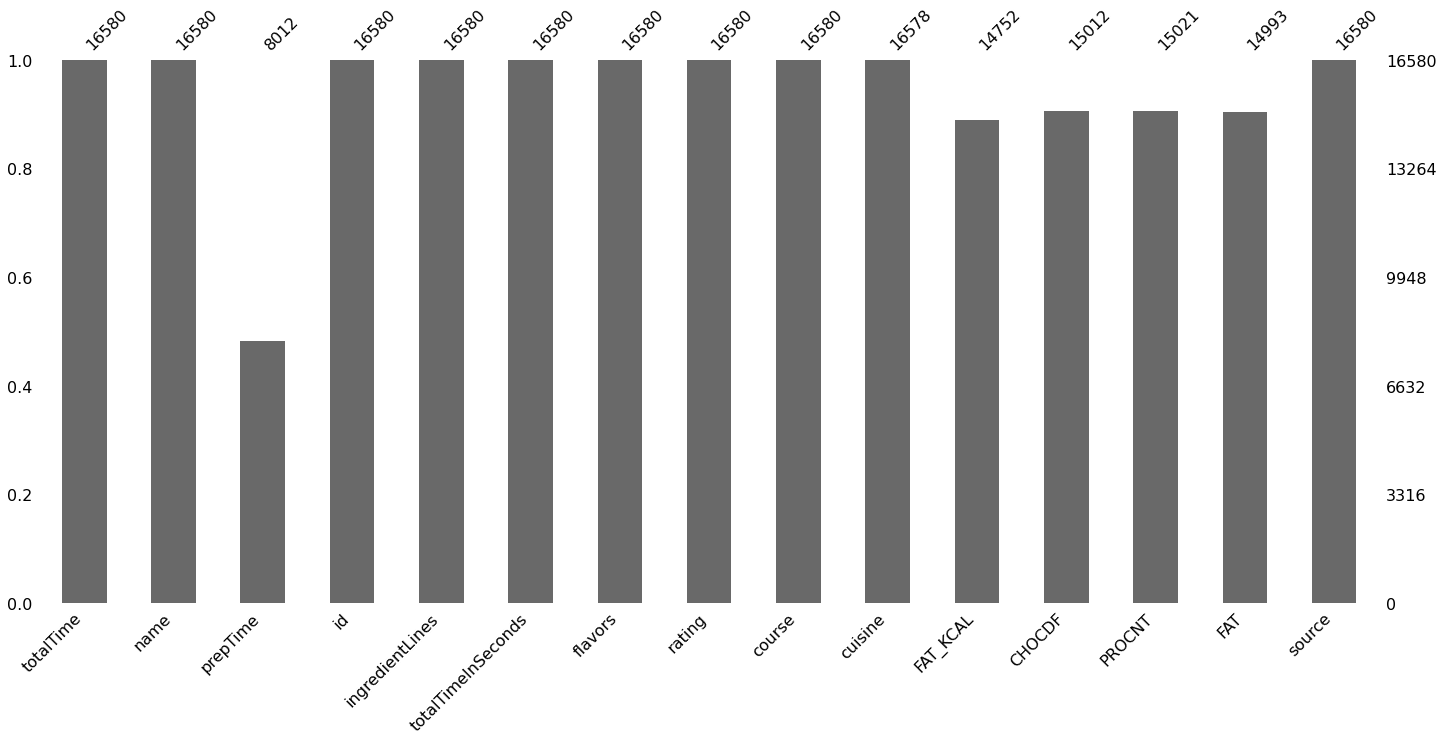

In [7]:
# check for missing values
msno.bar(data) ;

- Since we have total time in seconds and total time, I will drop prepTime
- I need to handle the cuisine and course columns (data is lists), ingredientLines (I want to extract the ingredients without the amounts/additional information, name (standardize format), yield (convert this into integer)

In [8]:
# drop prepTime
data.drop('prepTime', axis = 1, inplace = True)

### 3.1 Cuisine

In [9]:
data['cuisine'].head()

0             ['Chinese']
1               ['Irish']
2    ['Chinese', 'Asian']
3             ['Spanish']
4             ['Mexican']
Name: cuisine, dtype: object

In [10]:
# check null values
data[data["cuisine"].isnull()]

,totalTime,name,id,ingredientLines,totalTimeInSeconds,flavors,rating,course,cuisine,FAT_KCAL,CHOCDF,PROCNT,FAT,source
283,1 hr,Coconut Curry Red Lentil Soup,Coconut-Curry-Red-Lentil-Soup-2075988,"['1 cup red lentils', '3 cups vegetable broth'...",3600.0,"{'Bitter': 0.5, 'Meaty': 0.1667, 'Piquant': 0....",4,"['Soups', 'Main Dishes']",NaN,170.0,54.37,17.89,18.53,https://naturallyella.com/coconut-curry-red-le...
4441,8 hr 40 min,Slow Cooker Pork Carnitas,Slow-Cooker-Pork-Carnitas-2270910,"['1 tablespoon chili powder', '2 teaspoons gro...",31200.0,"{'Bitter': 0.6667, 'Meaty': 0.8333, 'Piquant':...",4,['Main Dishes'],NaN,140.0,14.22,46.68,16.18,https://damndelicious.net/2014/10/10/slow-cook...


- From the recipe source: coconut curry red lentil soup is indian, and slow cooker pork carnitas is mexican

In [11]:
# fill cuisine data
data.at[283,'cuisine'] = "['Indian']"
data.at[4441,'cuisine'] = "['Mexican']"

In [12]:
# evaluate string to list
data["cuisine"] = data["cuisine"].apply(eval)

In [13]:
# check frequency of cuisine
data['cuisine'].explode().value_counts()

Asian                   2472
Barbecue                1501
Mexican                 1061
Italian                 1039
Chinese                 1025
American                1019
French                  1019
Indian                  1015
Spanish                 1011
Moroccan                1002
Japanese                1001
English                 1000
Greek                    999
German                   997
Thai                     996
Irish                    849
Hawaiian                 777
Cuban                    729
Hungarian                613
Swedish                  543
Mediterranean            507
Kid-Friendly             499
Portuguese               295
Southwestern             268
Southern & Soul Food     116
Cajun & Creole            52
Vietnamese                21
Filipino                  15
Turkish                   13
Korean                    11
Brazilian                  5
Jamaican                   2
Name: cuisine, dtype: int64

In [14]:
# Add feature to see rows with multiple cuisines
data['number_of_cuisines'] = data['cuisine'].apply(lambda x: len(x))

In [15]:
# check frequency for rows with multiple cuisines per dish
data[data['number_of_cuisines']>1]['cuisine'].explode().value_counts()

Asian                   2470
Barbecue                1501
Chinese                  834
Japanese                 800
Thai                     794
Greek                    625
Mediterranean            507
Kid-Friendly             498
Mexican                  471
American                 432
Hawaiian                 293
Southwestern             268
Indian                   217
English                  189
Italian                  168
Cuban                    157
Moroccan                 127
Irish                    126
Spanish                  121
Southern & Soul Food     116
German                    90
French                    87
Portuguese                75
Cajun & Creole            52
Swedish                   33
Hungarian                 28
Vietnamese                21
Filipino                  15
Turkish                   13
Korean                    11
Brazilian                  5
Jamaican                   2
Name: cuisine, dtype: int64

- Out of 2472 appearances of "Asian", 2470 are tagged as some other cuisine as well
- Out of 1501 appearances of "Barbeque", 1501 are tagged as some other cuisine as well
- Out of 507 appearances of "Mediterranean", 507 are tagged as some other cuisine as well
- Out of 499 appearances of "Kid Friendly", 498 are tagged as some other cuisine as well
- I will remove these cuisines from the lists

In [16]:
def remove_cuisine(string, df):
    df.apply(lambda x: x.cuisine.remove(string) 
             if (x.number_of_cuisines > 1) & (string in set(x.cuisine)) else x, axis=1)

In [17]:
remove_cuisine('Asian', data)
remove_cuisine('Barbecue', data)
remove_cuisine('Mediterranean', data)
remove_cuisine('Kid-Friendly', data)

In [18]:
data.head()

,totalTime,name,id,ingredientLines,totalTimeInSeconds,flavors,rating,course,cuisine,FAT_KCAL,CHOCDF,PROCNT,FAT,source,number_of_cuisines
0,7 hr 30 min,TAKEOUT STYLE CHINESE SPARE RIBS (TAKE 2),TAKEOUT-STYLE-CHINESE-SPARE-RIBS-_TAKE-2_-771701,"['5 cloves freshly minced garlic', '1 tablespo...",27000.0,"{'Bitter': 0.8333, 'Meaty': 0.6667, 'Piquant':...",4,['Main Dishes'],[Chinese],170.0,39.67,20.02,18.81,http://thewoksoflife.com/2014/03/takeout-style...,1
1,2 hr 15 min,Corned Beef and Vegetables,Corned-Beef-and-Vegetables-1907240,"['1 whole corned beef brisket (6 to 8 pounds),...",8100.0,"{'Bitter': 0.1667, 'Meaty': 0.1667, 'Piquant':...",4,['Main Dishes'],[Irish],200.0,75.54,72.33,21.87,http://www.goingmywayz.com/corned-beef-vegetab...,1
2,40 min,Kung Pao Chicken,Kung-Pao-Chicken-1096839,"['1 tablespoon soy sauce', '2 teaspoons Chines...",2400.0,"{'Bitter': 0.1667, 'Meaty': 0.1667, 'Piquant':...",3,['Main Dishes'],[Chinese],140.0,8.14,26.70,15.91,http://www.epicurious.com/recipes/food/views/k...,2
3,1 hr 50 min,"Pulpo Gallego, Spanish Octopus with Paprika",Pulpo-Gallego_-Spanish-Octopus-with-Paprika-21...,"['2 to 3 pounds octopus', '1 bunch of parsley'...",6600.0,"{'Bitter': 0.8333, 'Meaty': 0.3333, 'Piquant':...",4,['Main Dishes'],[Spanish],190.0,10.38,35.21,20.67,https://honest-food.net/pulpo-gallego-recipe-o...,1
4,2 hr 45 min,Pork Carnitas,Pork-Carnitas-590301,"['4 pound boneless pork butt, fat trimmed and ...",9900.0,"{'Bitter': 0.3333, 'Meaty': 0.6667, 'Piquant':...",4,['Main Dishes'],[Mexican],120.0,2.82,19.51,12.51,http://www.mykitchenescapades.com/2012/11/pork...,1


In [19]:
# check frequency of cuisine
data['cuisine'].explode().value_counts()

Mexican                 1061
Italian                 1039
Chinese                 1025
French                  1019
American                1019
Indian                  1015
Spanish                 1011
Moroccan                1002
Japanese                1001
English                 1000
Greek                    999
German                   997
Thai                     996
Irish                    849
Hawaiian                 777
Cuban                    729
Hungarian                613
Swedish                  543
Portuguese               295
Southwestern             268
Southern & Soul Food     116
Cajun & Creole            52
Vietnamese                21
Filipino                  15
Turkish                   13
Korean                    11
Brazilian                  5
Jamaican                   2
Asian                      2
Kid-Friendly               1
Name: cuisine, dtype: int64

In [20]:
# check frequency for rows with multiple cuisines per dish
data['number_of_cuisines'] = data['cuisine'].apply(lambda x: len(x))
data[data['number_of_cuisines']>1]['cuisine'].explode().value_counts()

Mexican                 310
Southwestern            268
American                225
English                 137
Southern & Soul Food    116
Irish                   103
Spanish                  71
Chinese                  60
Cuban                    59
Cajun & Creole           52
Italian                  47
Portuguese               45
French                   44
Japanese                 38
Indian                   30
Thai                     26
Hawaiian                 25
Vietnamese               21
German                   18
Moroccan                 18
Filipino                 15
Hungarian                14
Turkish                  13
Greek                    12
Korean                   11
Swedish                   5
Brazilian                 5
Jamaican                  2
Name: cuisine, dtype: int64

- "Mexican" is repeated 310 times and "Southwestern" is repeated 268 times
- I will filter for all rows containing Southwestern and Mexican to see what other cuisines they are classified as

In [21]:
lst = ['Southwestern'] # filter Southwestern
m = data['cuisine'].apply(lambda s: len(set(s) & set(lst)) > 0)
data[m]['cuisine'].explode().value_counts()

Southwestern    268
Mexican         242
American         23
Cuban             8
English           2
Hawaiian          2
Indian            1
Thai              1
Spanish           1
Chinese           1
Name: cuisine, dtype: int64

In [22]:
lst = ['Mexican'] # filter Mexican
m = data['cuisine'].apply(lambda s: len(set(s) & set(lst)) > 0)
data[m]['cuisine'].explode().value_counts()

Mexican         1061
Southwestern     242
Cuban             41
American          16
Spanish            8
Hawaiian           7
Italian            2
Moroccan           2
English            1
Filipino           1
Greek              1
Irish              1
Name: cuisine, dtype: int64

- 242 "Southwestern" dishes out of 268 are also "Mexican", while 242 out of 1061 "Mexican" dishes are also "Southwestern" -> I will remove Southwestern from the cuisine list

In [23]:
remove_cuisine('Southwestern', data)

In [24]:
# check frequency of cuisines
data['cuisine'].explode().value_counts()

Mexican                 1061
Italian                 1039
Chinese                 1025
American                1019
French                  1019
Indian                  1015
Spanish                 1011
Moroccan                1002
Japanese                1001
English                 1000
Greek                    999
German                   997
Thai                     996
Irish                    849
Hawaiian                 777
Cuban                    729
Hungarian                613
Swedish                  543
Portuguese               295
Southern & Soul Food     116
Cajun & Creole            52
Vietnamese                21
Filipino                  15
Turkish                   13
Korean                    11
Brazilian                  5
Asian                      2
Jamaican                   2
Kid-Friendly               1
Name: cuisine, dtype: int64

- I will drop cuisines with less that 500 recipes from the dataset

In [25]:
# filter for cuisines with more than 500 recipes
cuisine_list = data['cuisine'].explode().value_counts()
cuisine_list = list(cuisine_list[cuisine_list>500].index)

In [26]:
print('Final list of cuisines: {}'.format(list(cuisine_list)))

Final list of cuisines: ['Mexican', 'Italian', 'Chinese', 'American', 'French', 'Indian', 'Spanish', 'Moroccan', 'Japanese', 'English', 'Greek', 'German', 'Thai', 'Irish', 'Hawaiian', 'Cuban', 'Hungarian', 'Swedish']


In [27]:
# check repeated cuisines
data['number_of_cuisines'] = data['cuisine'].apply(lambda x: len(x))
data[data['number_of_cuisines']>1]['cuisine'].explode().value_counts()

American                208
English                 135
Southern & Soul Food    116
Irish                   103
Mexican                  80
Spanish                  70
Chinese                  60
Cuban                    57
Cajun & Creole           52
Italian                  47
Portuguese               45
French                   44
Japanese                 38
Indian                   29
Thai                     26
Hawaiian                 23
Vietnamese               21
Moroccan                 18
German                   18
Filipino                 15
Hungarian                14
Turkish                  13
Greek                    12
Korean                   11
Swedish                   5
Brazilian                 5
Jamaican                  2
Name: cuisine, dtype: int64

In [28]:
# remove cuisines that are not in the final list of cuisines
all_cuisines = set(data[data['number_of_cuisines']>1]['cuisine'].explode().value_counts().index)
remove_lst = list(all_cuisines - set(cuisine_list))

for i in remove_lst:
    remove_cuisine(i, data)

In [29]:
# drop rows that are not in the final list of cuisines
mask = data['cuisine'].apply(lambda s: len(set(s) & set(cuisine_list)) > 0)
data = data[mask]

In [30]:
# check for rows with multiple cuisines
data['number_of_cuisines'] = data['cuisine'].apply(lambda x: len(x))
data[data['number_of_cuisines']>1]['cuisine'].explode().value_counts()

English      134
Irish        103
Mexican       79
American      67
Cuban         53
Italian       47
French        43
Chinese       42
Japanese      32
Spanish       26
Indian        24
Hawaiian      20
German        17
Moroccan      16
Hungarian     14
Thai          12
Swedish        5
Greek          2
Name: cuisine, dtype: int64

- I am going to consider everything remaining as fusion recipes => to make things simpler, I will remove all fusion recipes that belong to more than one of the main cuisines from my dataset

In [31]:
data['number_of_cuisines'].value_counts()

1    15959
2      365
3        2
Name: number_of_cuisines, dtype: int64

In [32]:
data = data[data['number_of_cuisines'] < 2]

In [33]:
data.shape

(15959, 15)

In [34]:
# check frequency of cuisines
data['cuisine'].explode().value_counts()

Greek        997
Italian      992
Indian       991
Moroccan     986
Spanish      985
Thai         984
Chinese      983
Mexican      982
German       980
French       976
Japanese     969
American     952
English      866
Hawaiian     757
Irish        746
Cuban        676
Hungarian    599
Swedish      538
Name: cuisine, dtype: int64

In [35]:
# convert cuisine from a list to a string
data['cuisine'] = data['cuisine'].str.join(',')

In [36]:
# drop number of cuisines column (since all rows only have 1 cuisine now)
data.drop('number_of_cuisines', axis =1, inplace = True)

### 3.2 Course

In [37]:
# check first 5 rows
data['course'].head()

0    ['Main Dishes']
1    ['Main Dishes']
2    ['Main Dishes']
3    ['Main Dishes']
4    ['Main Dishes']
Name: course, dtype: object

In [38]:
#check null values
data['course'].isnull().sum()

0

In [39]:
# evaluate string to list
data['course'] = data['course'].apply(eval)

In [40]:
# check frequency of course
data['course'].explode().value_counts()

Main Dishes              15959
Lunch                     1723
Soups                      534
Appetizers                 285
Salads                     185
Breakfast and Brunch       148
Side Dishes                113
Snacks                      29
Breads                      18
Condiments and Sauces       14
Desserts                    13
Name: course, dtype: int64

In [41]:
# check frequency for rows with multiple courses per dish
data['number_of_courses'] = data['course'].apply(lambda x: len(x))
data[data['number_of_courses']>1]['course'].explode().value_counts()

Main Dishes              2865
Lunch                    1723
Soups                     534
Appetizers                285
Salads                    185
Breakfast and Brunch      148
Side Dishes               113
Snacks                     29
Breads                     18
Condiments and Sauces      14
Desserts                   13
Name: course, dtype: int64

In [42]:
lst = ['Main Dishes'] # filter Main Dishes
m = data['course'].apply(lambda s: len(set(s) & set(lst)) > 0)
data[m].head()

,totalTime,name,id,ingredientLines,totalTimeInSeconds,flavors,rating,course,cuisine,FAT_KCAL,CHOCDF,PROCNT,FAT,source,number_of_courses
0,7 hr 30 min,TAKEOUT STYLE CHINESE SPARE RIBS (TAKE 2),TAKEOUT-STYLE-CHINESE-SPARE-RIBS-_TAKE-2_-771701,"['5 cloves freshly minced garlic', '1 tablespo...",27000.0,"{'Bitter': 0.8333, 'Meaty': 0.6667, 'Piquant':...",4,[Main Dishes],Chinese,170.0,39.67,20.02,18.81,http://thewoksoflife.com/2014/03/takeout-style...,1
1,2 hr 15 min,Corned Beef and Vegetables,Corned-Beef-and-Vegetables-1907240,"['1 whole corned beef brisket (6 to 8 pounds),...",8100.0,"{'Bitter': 0.1667, 'Meaty': 0.1667, 'Piquant':...",4,[Main Dishes],Irish,200.0,75.54,72.33,21.87,http://www.goingmywayz.com/corned-beef-vegetab...,1
2,40 min,Kung Pao Chicken,Kung-Pao-Chicken-1096839,"['1 tablespoon soy sauce', '2 teaspoons Chines...",2400.0,"{'Bitter': 0.1667, 'Meaty': 0.1667, 'Piquant':...",3,[Main Dishes],Chinese,140.0,8.14,26.70,15.91,http://www.epicurious.com/recipes/food/views/k...,1
3,1 hr 50 min,"Pulpo Gallego, Spanish Octopus with Paprika",Pulpo-Gallego_-Spanish-Octopus-with-Paprika-21...,"['2 to 3 pounds octopus', '1 bunch of parsley'...",6600.0,"{'Bitter': 0.8333, 'Meaty': 0.3333, 'Piquant':...",4,[Main Dishes],Spanish,190.0,10.38,35.21,20.67,https://honest-food.net/pulpo-gallego-recipe-o...,1
4,2 hr 45 min,Pork Carnitas,Pork-Carnitas-590301,"['4 pound boneless pork butt, fat trimmed and ...",9900.0,"{'Bitter': 0.3333, 'Meaty': 0.6667, 'Piquant':...",4,[Main Dishes],Mexican,120.0,2.82,19.51,12.51,http://www.mykitchenescapades.com/2012/11/pork...,1


- This is not very useful since every course in the data set is labeled as "main dishes", and over 80% of the data set is only labeled as "main dishes"
- I will drop this column


In [43]:
data.drop(['course', 'number_of_courses'], axis = 1, inplace = True)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15959 entries, 0 to 16579
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   totalTime           15959 non-null  object 
 1   name                15959 non-null  object 
 2   id                  15959 non-null  object 
 3   ingredientLines     15959 non-null  object 
 4   totalTimeInSeconds  15959 non-null  float64
 5   flavors             15959 non-null  object 
 6   rating              15959 non-null  int64  
 7   cuisine             15959 non-null  object 
 8   FAT_KCAL            14193 non-null  float64
 9   CHOCDF              14443 non-null  float64
 10  PROCNT              14451 non-null  float64
 11  FAT                 14425 non-null  float64
 12  source              15959 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 1.7+ MB


### 3.4 Rating

In [45]:
data['rating'].describe()

count    15959.000000
mean         3.800927
std          0.625849
min          0.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

In [46]:
data['rating'].isnull().sum()

0

In [47]:
len(data[data['rating']==0])

68

- The rating feature looks ok - there are no null values and all values are between 0 and 5, with a mean of 3.8 which is what I would expect
- There are 68 recipes with a rating of 0...These recipes have most likely not been rated (i.e. are not very popular, rather than have been rated very poorly)

### 3.5 Flavors

In [48]:
# evaluate string to dict
data['flavors'] = data['flavors'].apply(eval)

In [49]:
data['flavors'].isnull().sum()

0

In [50]:
data[data['flavors']=={}]['flavors'].count()/len(data)

0.30615953380537625

- 30.6% of the data is missing flavors data
- I don't want rows that are missing flavors data to be confused with rows where the flavor profile for a specific flavor is 0
- I will create a seperate feature for missing flavors data

In [51]:
data['flav_is_missing'] = (data['flavors'] == {}).astype(int)
data['flav_is_missing'].value_counts(normalize = True)

0    0.69384
1    0.30616
Name: flav_is_missing, dtype: float64

In [52]:
pct_missing = data[data.flavors == {}].groupby('cuisine').flavors.count()/data.groupby('cuisine').flavors.count()*100
pct_missing.sort_values(ascending = False)

cuisine
Japanese     45.820433
Thai         45.528455
Mexican      37.270876
Indian       35.519677
Italian      35.181452
American     33.403361
Hawaiian     31.836196
English      31.639723
French       29.918033
Irish        27.613941
Moroccan     26.876268
Spanish      26.598985
Chinese      26.449644
Greek        25.877633
Cuban        24.260355
German       20.918367
Hungarian    17.028381
Swedish      14.869888
Name: flavors, dtype: float64

- For Japanese and Thai food, 45% of the dishes are missing flavor data
- For now, I will clean these columns...I may use it for EDA but there is a lot of missing data

In [53]:
json_struct = json.loads(data.to_json(orient="records"))    
data = pd.io.json.json_normalize(json_struct) #use pd.io.json
data.rename(columns={'flavors.Bitter': 'Bitter', 'flavors.Meaty': 'Meaty', 'flavors.Piquant': 'Piquant',
              'flavors.Salty':'Salty', 'flavors.Sour':'Sour', 'flavors.Sweet':'Sweet'}, inplace=True)

In [54]:
flavor_col = ['Bitter', 'Meaty', 'Piquant','Salty', 'Sour', 'Sweet']
data[flavor_col].describe()

,Bitter,Meaty,Piquant,Salty,Sour,Sweet
count,11073.000000,11073.000000,11073.000000,11073.000000,11073.000000,11073.000000
mean,0.416065,0.384595,0.264343,0.493094,0.447445,0.215969
std,0.266016,0.253273,0.296682,0.280116,0.273661,0.132774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166700,0.166700,0.000000,0.166700,0.166700,0.166700
50%,0.333300,0.333300,0.166700,0.500000,0.333300,0.166700
75%,0.666700,0.666700,0.500000,0.833300,0.666700,0.166700
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Flavors are broken down into 6 categories: Bitter, Meaty, Piquant, Salty, Sour, and Sweet
- Each category is rated between 0 and 1, taking 1 of 6 discrete values: for readability, i will convert this to a scale between 1 to 6

In [55]:
# fill nan as 0
data[flavor_col] = data[flavor_col].fillna(0)

In [56]:
# change scale to 0-6
data[flavor_col] = round(data[flavor_col]*6).astype(int)

In [57]:
data.head()

,totalTime,name,id,ingredientLines,totalTimeInSeconds,rating,cuisine,FAT_KCAL,CHOCDF,PROCNT,FAT,source,flav_is_missing,Bitter,Meaty,Piquant,Salty,Sour,Sweet
0,7 hr 30 min,TAKEOUT STYLE CHINESE SPARE RIBS (TAKE 2),TAKEOUT-STYLE-CHINESE-SPARE-RIBS-_TAKE-2_-771701,"['5 cloves freshly minced garlic', '1 tablespo...",27000.0,4,Chinese,170.0,39.67,20.02,18.81,http://thewoksoflife.com/2014/03/takeout-style...,0,5,4,1,5,3,5
1,2 hr 15 min,Corned Beef and Vegetables,Corned-Beef-and-Vegetables-1907240,"['1 whole corned beef brisket (6 to 8 pounds),...",8100.0,4,Irish,200.0,75.54,72.33,21.87,http://www.goingmywayz.com/corned-beef-vegetab...,0,1,1,3,1,5,1
2,40 min,Kung Pao Chicken,Kung-Pao-Chicken-1096839,"['1 tablespoon soy sauce', '2 teaspoons Chines...",2400.0,3,Chinese,140.0,8.14,26.70,15.91,http://www.epicurious.com/recipes/food/views/k...,0,1,1,5,1,1,1
3,1 hr 50 min,"Pulpo Gallego, Spanish Octopus with Paprika",Pulpo-Gallego_-Spanish-Octopus-with-Paprika-21...,"['2 to 3 pounds octopus', '1 bunch of parsley'...",6600.0,4,Spanish,190.0,10.38,35.21,20.67,https://honest-food.net/pulpo-gallego-recipe-o...,0,5,2,3,1,5,1
4,2 hr 45 min,Pork Carnitas,Pork-Carnitas-590301,"['4 pound boneless pork butt, fat trimmed and ...",9900.0,4,Mexican,120.0,2.82,19.51,12.51,http://www.mykitchenescapades.com/2012/11/pork...,0,2,4,0,4,3,1


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15959 entries, 0 to 15958
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   totalTime           15959 non-null  object 
 1   name                15959 non-null  object 
 2   id                  15959 non-null  object 
 3   ingredientLines     15959 non-null  object 
 4   totalTimeInSeconds  15959 non-null  float64
 5   rating              15959 non-null  int64  
 6   cuisine             15959 non-null  object 
 7   FAT_KCAL            14193 non-null  float64
 8   CHOCDF              14443 non-null  float64
 9   PROCNT              14451 non-null  float64
 10  FAT                 14425 non-null  float64
 11  source              15959 non-null  object 
 12  flav_is_missing     15959 non-null  int64  
 13  Bitter              15959 non-null  int64  
 14  Meaty               15959 non-null  int64  
 15  Piquant             15959 non-null  int64  
 16  Salt

### 3.6 Nutrition

In [59]:
nutr_col = ['FAT', 'PROCNT', 'CHOCDF','FAT_KCAL']
data[nutr_col].describe()

,FAT,PROCNT,CHOCDF,FAT_KCAL
count,14425.000000,14451.000000,14443.000000,14193.000000
mean,26.724422,30.421901,35.953472,244.600155
std,22.629825,21.572775,30.963705,203.384320
min,0.000000,0.010000,0.040000,10.000000
25%,10.960000,14.940000,13.525000,100.000000
50%,20.750000,26.860000,27.690000,190.000000
75%,35.630000,40.265000,49.510000,320.000000
max,201.690000,131.520000,363.090000,1820.000000


In [60]:
data[nutr_col].isnull().sum()/len(data)*100

FAT          9.612131
PROCNT       9.449214
CHOCDF       9.499342
FAT_KCAL    11.065856
dtype: float64

- Lets do a quick check to see if this data makes sense: Fat has 9 cal/g, Protein has 4 cal/g and Carbohydrates have 4 cal/g
- The calories from these 3 components should be less than the total calories 

In [61]:
data['calculated_cal'] = data['FAT']*9 + data['PROCNT']*4 + data['CHOCDF']*4
data[data['calculated_cal']<data['FAT_KCAL']]

,totalTime,name,id,ingredientLines,totalTimeInSeconds,rating,cuisine,FAT_KCAL,CHOCDF,PROCNT,FAT,source,flav_is_missing,Bitter,Meaty,Piquant,Salty,Sour,Sweet,calculated_cal
6689,20 min,Spanish Sizzled Shrimp,Spanish-Sizzled-Shrimp-Recipezaar,"['1 tablespoon extra virgin olive oil', '3 gar...",1200.0,4,Spanish,20.0,0.96,0.11,1.72,http://www.food.com/recipe/spanish-sizzled-shr...,0,5,1,1,5,5,1,19.76
11854,50 min,Moroccan-Style Beef Kebabs,Moroccan-Style-Beef-Kebabs-1774128,"['450g (1lb) extra lean ground beef', '3 tbs f...",3000.0,4,Moroccan,20.0,0.79,0.16,1.76,http://canuckcuisine.com/moroccan-style-beef-k...,0,5,4,0,5,5,1,19.64


In [62]:
check = data[data['calculated_cal']>data['FAT_KCAL']]

check['pct'] = (check['calculated_cal']-check['FAT_KCAL'])/check['FAT_KCAL']*100
check['pct'].describe()

count    14182.000000
mean       186.626855
std        236.637243
min          0.797500
25%         69.836926
50%        116.894940
75%        214.362798
max       5457.500000
Name: pct, dtype: float64

- This data looks extremely incorrect - on average, the calories based on the fat/carbs/protein content of a recipe  is 187% greater than what is shows in the calories column
- I am going to remove these features since they cannot offer any useful information.

In [63]:
data.drop(nutr_col, axis = 1, inplace = True)

In [64]:
data.drop('calculated_cal', axis = 1, inplace = True)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15959 entries, 0 to 15958
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   totalTime           15959 non-null  object 
 1   name                15959 non-null  object 
 2   id                  15959 non-null  object 
 3   ingredientLines     15959 non-null  object 
 4   totalTimeInSeconds  15959 non-null  float64
 5   rating              15959 non-null  int64  
 6   cuisine             15959 non-null  object 
 7   source              15959 non-null  object 
 8   flav_is_missing     15959 non-null  int64  
 9   Bitter              15959 non-null  int64  
 10  Meaty               15959 non-null  int64  
 11  Piquant             15959 non-null  int64  
 12  Salty               15959 non-null  int64  
 13  Sour                15959 non-null  int64  
 14  Sweet               15959 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 1.8+

### 3.7 Time

- I would prefer to have the time in minutes for consistency

In [66]:
data['totalTimeInMinutes'] = data['totalTimeInSeconds']/60

In [67]:
data = data[data['totalTimeInMinutes']>=10]

In [68]:
data.drop(['totalTimeInSeconds', 'totalTime'], axis = 1, inplace = True)

### 3.8 Name, ID

- convert name and ID to lower string for consistency

In [69]:
data['name'] = data['name'].str.lower()
data['id'] = data['id'].str.lower()

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15901 entries, 0 to 15958
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                15901 non-null  object 
 1   id                  15901 non-null  object 
 2   ingredientLines     15901 non-null  object 
 3   rating              15901 non-null  int64  
 4   cuisine             15901 non-null  object 
 5   source              15901 non-null  object 
 6   flav_is_missing     15901 non-null  int64  
 7   Bitter              15901 non-null  int64  
 8   Meaty               15901 non-null  int64  
 9   Piquant             15901 non-null  int64  
 10  Salty               15901 non-null  int64  
 11  Sour                15901 non-null  int64  
 12  Sweet               15901 non-null  int64  
 13  totalTimeInMinutes  15901 non-null  float64
dtypes: float64(1), int64(8), object(5)
memory usage: 1.8+ MB


In [71]:
data.head()

,name,id,ingredientLines,rating,cuisine,source,flav_is_missing,Bitter,Meaty,Piquant,Salty,Sour,Sweet,totalTimeInMinutes
0,takeout style chinese spare ribs (take 2),takeout-style-chinese-spare-ribs-_take-2_-771701,"['5 cloves freshly minced garlic', '1 tablespo...",4,Chinese,http://thewoksoflife.com/2014/03/takeout-style...,0,5,4,1,5,3,5,450.0
1,corned beef and vegetables,corned-beef-and-vegetables-1907240,"['1 whole corned beef brisket (6 to 8 pounds),...",4,Irish,http://www.goingmywayz.com/corned-beef-vegetab...,0,1,1,3,1,5,1,135.0
2,kung pao chicken,kung-pao-chicken-1096839,"['1 tablespoon soy sauce', '2 teaspoons Chines...",3,Chinese,http://www.epicurious.com/recipes/food/views/k...,0,1,1,5,1,1,1,40.0
3,"pulpo gallego, spanish octopus with paprika",pulpo-gallego_-spanish-octopus-with-paprika-21...,"['2 to 3 pounds octopus', '1 bunch of parsley'...",4,Spanish,https://honest-food.net/pulpo-gallego-recipe-o...,0,5,2,3,1,5,1,110.0
4,pork carnitas,pork-carnitas-590301,"['4 pound boneless pork butt, fat trimmed and ...",4,Mexican,http://www.mykitchenescapades.com/2012/11/pork...,0,2,4,0,4,3,1,165.0


### 3.9 Ingredients

* extract a list of ingredients only from the ingredient lines

In [72]:
data.reset_index(drop = True, inplace = True)

In [73]:
data['ingredientLines'] = data.ingredientLines.apply(lambda x: literal_eval(str(x)))

In [74]:
# import ingredients parser
import ingredients_parser

In [75]:
# parse ingredient lines for clean list of ingredients
data['ingredients'] = data['ingredientLines'].apply(lambda x: ingredients_parser.clean_ingredients(x))

In [76]:
# check first 5 rows
data.head()

,name,id,ingredientLines,rating,cuisine,source,flav_is_missing,Bitter,Meaty,Piquant,Salty,Sour,Sweet,totalTimeInMinutes,ingredients
0,takeout style chinese spare ribs (take 2),takeout-style-chinese-spare-ribs-_take-2_-771701,"[5 cloves freshly minced garlic, 1 tablespoon ...",4,Chinese,http://thewoksoflife.com/2014/03/takeout-style...,0,5,4,1,5,3,5,450.0,"[hoisin sauce, water, spice, star anise, garli..."
1,corned beef and vegetables,corned-beef-and-vegetables-1907240,"[1 whole corned beef brisket (6 to 8 pounds), ...",4,Irish,http://www.goingmywayz.com/corned-beef-vegetab...,0,1,1,3,1,5,1,135.0,"[water, carrot, beef brisket, coriander, parsn..."
2,kung pao chicken,kung-pao-chicken-1096839,"[1 tablespoon soy sauce, 2 teaspoons Chinese r...",3,Chinese,http://www.epicurious.com/recipes/food/views/k...,0,1,1,5,1,1,1,40.0,"[ginger, chicken, sichuan pepper, black vinega..."
3,"pulpo gallego, spanish octopus with paprika",pulpo-gallego_-spanish-octopus-with-paprika-21...,"[2 to 3 pounds octopus, 1 bunch of parsley, To...",4,Spanish,https://honest-food.net/pulpo-gallego-recipe-o...,0,5,2,3,1,5,1,110.0,"[cayenne, lemon, black pepper, garlic, paprika..."
4,pork carnitas,pork-carnitas-590301,"[4 pound boneless pork butt, fat trimmed and c...",4,Mexican,http://www.mykitchenescapades.com/2012/11/pork...,0,2,4,0,4,3,1,165.0,"[water, lime, cumin, onion, pepper, oregano, o..."


In [77]:
# create row for number of ingredients
data['number_of_ingredients'] = data['ingredients'].str.len()

In [78]:
# remove data with only one ingredient
data = data[data['number_of_ingredients']>1]

In [79]:
# save df
data.to_csv('../data/processed/cleaned_data.csv', index = False)